# Lecture 27 - Fisher's Linear Discriminant Analysis (LDA) continued

## Fisher's Linear Discriminant

A very popular type of a linear discriminant is the **Fisher's Linear Discriminant**.

* Given two classes, we can compute the mean of each class:
$$\mathbf{\overrightarrow{m}}_1 = \frac{1}{{N}_1}\sum_{n\in C_1} \mathbf{\overrightarrow{x}_n}$$

$$\mathbf{\overrightarrow{m}_2} = \frac{1}{N_2}\sum_{n\in C_2} \mathbf{\overrightarrow{x}_n}$$

We can maximize the separation of the means:

$$m_2 - m_1 = \mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)$$

* $\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}$ takes a $D$ dimensional data point and projects it down to 1-D with a weight sum of the original features. We want to find a weighting that maximizes the separation of the class means. 

* Not only do we want well separated means for each class, but we also want each class to be *compact* to minimize overlap between the classes. 

* Consider the *within class variance:*

\begin{align*}
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2 &= \sum_{n \in C_k} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_k)^2 \\
&= \mathbf{\overrightarrow{w}}^T \sum_{n \in C_k} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k}) (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}_k})^T \mathbf{\overrightarrow{w}}
\end{align*}

* So, we want to minimize within class variance and maximize between class separability. How about the following objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}\\
      &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\sum_{n \in C_1} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_1)^2 + \sum_{n \in C_2} (\mathbf{\overrightarrow{w}}^T\mathbf{\overrightarrow{x}}_n - m_2)^2}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\left(\sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T\right)\mathbf{\overrightarrow{w}}}\\
	  &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}
\end{align*}

where

$$S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$$

and 

$$S_W= \sum_{n \in C_1} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_1)^T + \sum_{n \in C_2} (\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)(\mathbf{\overrightarrow{x}}_n - \mathbf{\overrightarrow{m}}_2)^T$$

* Ok, so let's optimize:

\begin{align*}
\frac{\partial J(\mathbf{\overrightarrow{w}})}{\partial \mathbf{\overrightarrow{w}}} &= \frac{2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} - 2(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} = 0 \\
0 &= \ \frac{\mathbf{S}_B\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})} -\frac{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}}}{(\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})^2} \\
 (\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}})\mathbf{S}_B\mathbf{\overrightarrow{w}} &= (\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}})\mathbf{S}_W\mathbf{\overrightarrow{w}} \\
 \mathbf{S}_B \mathbf{\overrightarrow{w}} &= \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}}{\mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}} \mathbf{S}_W\mathbf{\overrightarrow{w}}\\
 \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

where the scalar $\lambda = \frac{\mathbf{\overrightarrow{w}}^T\mathbf{S}_B\mathbf{\overrightarrow{w}}} { \mathbf{\overrightarrow{w}}^T\mathbf{S}_W\mathbf{\overrightarrow{w}}}$

#### *Does this look familiar?*

This is the generalized eigenvalue problem!

* So the direction of projection correspond to the eigenvectors of $\mathbf{S}_W^{-1}\mathbf{S}_B$ with the largest eigenvalues.

The solution is easy when $S_w^{-1} = (\Sigma_1 + \Sigma_2)^{-1}$ exists.

In this case, if we use the definition of $S_B = (\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2 - \mathbf{\overrightarrow{m}}_1)^T$:

\begin{align*}
S_W^{-1}S_B\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}\\
S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}} &= \lambda\mathbf{\overrightarrow{w}}
\end{align*}

Noting that $\alpha = (\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)^T\mathbf{\overrightarrow{w}}$ is a constant, this can be written as:

$$S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = \frac{\lambda}{\alpha}\mathbf{\overrightarrow{w}}$$

* Since we don't care about the magnitude of $\mathbf{\overrightarrow{w}}$:

$$\mathbf{\overrightarrow{w}}^* = S_W^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1) = (\Sigma_1 + \Sigma_2)^{-1}(\mathbf{\overrightarrow{m}}_2-\mathbf{\overrightarrow{m}}_1)$$

Make sure $\mathbf{\overrightarrow{w}}^*$ is a unit vector by taking: $\mathbf{\overrightarrow{w}}^* \leftarrow \frac{\mathbf{\overrightarrow{w}}^*}{\Vert\mathbf{\overrightarrow{w}}^*\Vert}$

* Note that if the within-class covariance, $S_W$, is isotropic, so that $S_W$ is proportional to the unit matrix, we find that $\mathbf{\overrightarrow{w}}$ is proportional to the difference of the class means.

* This result is known as *Fisher's linear discriminant*, although strictly it is not a discriminant but rather a specific choice of direction for projection of the data down to one dimension. However, the projected data can subsequently be used to construct a discriminant, by choosing a threshold $y_0$ so that we classify a new point as belonging to $C_1$ if $y(x) \geq y_0$ and classify it as belonging to $C_2$ otherwise.

Also, note that:
* For a classification problem with Gaussian classes of equal covariance $\Sigma_i=\Sigma$, the boundary is the plane of normal:
$$\mathbf{\overrightarrow{w}} = \Sigma^{-1}(\mathbf{\overrightarrow{m}}_i-\mathbf{\overrightarrow{m}}_j)$$

* If $\Sigma_2=\Sigma_1$, this is also the LDA solution.

This gives two different **interpretations** of LDA:

* It is optimal *if and only if* the classes are Gaussian and have equal covariance.

* A classifier on the LDA features, is equivalent to the boundary after the approximation of the data by two Gaussians with equal covariance.

The final discriminant decision boundary is $\mathbf{\overrightarrow{y}} = \mathbf{\overrightarrow{w}}^*\mathbf{\overrightarrow{x}} + w_0$

The *bias* term $w_0$ can be defined as:

$$w_0 = \frac{1}{2}\left(\frac{1}{N_1}\sum_{n\in C_1}\overrightarrow{x}_n + \frac{1}{N_2}\sum_{n\in C_2}\overrightarrow{x}_n \right)\mathbf{\overrightarrow{w}}^*$$

* An extension to multi-class problems has a similar derivation.

**Limitations** of LDA:

1. LDA produces at most $C-1$ feature projections, where $C$ is the number of classes.

2. If the classification error estimates establish that more features are needed, some other method must be employed to provide those additional features.

3. LDA is a parametric method (it assumes unimodal Gaussian likelihoods).

4. If the distributions are significantly non-Gaussian, the LDA projections may not preserve complex structure in the data needed for classification.

5. LDA will also fail if discriminatory information is not in the mean but in the variance of the data.

A popular variant of LDA are the **Multi-Layer Perceptrons** (or MLPs).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

[[ 9.04960291e-02 -1.02389842e-02]
 [-2.08253935e+00  1.78309154e-02]
 [-9.33398834e-01 -1.87300896e-01]
 [ 3.49876528e-01 -1.44760777e-01]
 [ 2.00589673e+00 -7.94219766e-02]
 [ 2.13522544e-01 -1.57460151e-01]
 [ 5.56097310e-01  6.21930052e-02]
 [-2.66084308e+00 -2.37636330e-01]
 [-3.77930511e-01 -7.77222476e-03]
 [ 1.46613136e+00 -7.97514124e-02]
 [-8.92650400e-01 -6.14849383e-03]
 [ 9.32712188e-02 -1.66935635e-03]
 [ 7.01277473e-01 -8.82374179e-02]
 [ 1.32356005e+00  1.66617849e-01]
 [ 1.47906219e+00  1.63373798e-02]
 [-5.09725886e-02 -3.60370112e-02]
 [-1.30410470e-01  3.59645766e-02]
 [ 1.07688407e+00  1.24165518e-01]
 [ 5.39114902e-01 -6.58043098e-02]
 [-4.99683086e-01  1.08786570e-01]
 [-1.78607858e+00  7.63181306e-02]
 [ 6.83419766e-02 -1.38880605e-03]
 [ 2.08367694e+00  4.78455947e-02]
 [-9.58778840e-02 -1.53331973e-01]
 [ 7.85581993e-01 -7.86074582e-02]
 [-1.64193857e-01  7.45544348e-02]
 [ 1.09144442e+00  8.26708304e-02]
 [-3.05623743e-01 -2.23583666e-01]
 [-4.69232053e-01  1

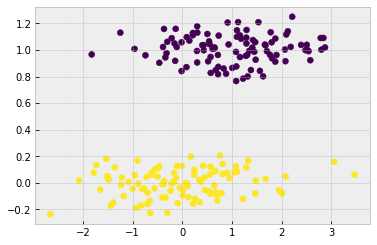

In [8]:
def fisherDiscriminant(data,t):
    data1 = data[t==0,:]
    data2 = data[t==1,:]
    mean1 = np.atleast_2d(np.mean(data1,0))
    mean2 = np.atleast_2d(np.mean(data2,0))
    Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
    Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
    Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
    w = np.linalg.inv(Sw)@(mean2 - mean1).T
    w = w/np.linalg.norm(w)
    data_t = data@w
    return w, data_t

def discriminant(data, labels, v):
    v_perp = np.array([v[1], -v[0]])
    b = ((np.mean(data[labels==0,:],axis=0)+np.mean(data[labels==1,:],axis=0))/2)@v
    lambda_vec = np.linspace(-3,3,len(data))
    v_line = lambda_vec * v
    decision_boundary = b * v + lambda_vec * v_perp
    return v_line, decision_boundary

# Generate Synthetic Data
N1 = 100 #number of points for class1
N2 = 100 #number of points for class0
covM = [1,0.01]*np.eye(2) # covariance matrix
data = np.random.multivariate_normal([0,0], covM, N1) #generate points  for class 1
X = np.vstack((data, np.random.multivariate_normal([1,1], covM, N2))) #generate points for class 0
labels = np.hstack((np.ones(N1),np.zeros(N2)))
print(X)
plt.scatter(X[:,0],X[:,1],c=labels); plt.show();

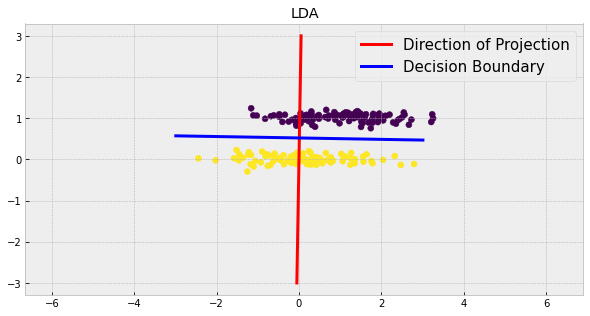

In [3]:
v, Y = fisherDiscriminant(X,labels)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=labels)

v_line, decision_boundary = discriminant(X, labels, v);

plt.plot(v_line[0], v_line[1], 'red', linewidth=3, label='Direction of Projection')
plt.plot(decision_boundary[0,:], decision_boundary[1,:],'blue',linewidth=3, label='Decision Boundary')
plt.title('LDA'); plt.axis('equal'); plt.legend(loc='best',fontsize=15);

___

# Least Squares Classification as a Linear Discriminant Function

We could use a **least squares** error function to solve for $\mathbf{\overrightarrow{w}}$ and $w_0$ as we did in regression.  But, there are some issues. *Can you think of any?*

* In regression, the prediction label will be a continuous number between $[-1,1]$. So the predicted class label will be for example: -0.8, 0.4 or 0.01. To simplify, we can say, if the predicted class $y \geq 0$ than is class 1 otherwise is class 0.
* The problem that comes about is that, if we look at the distribution of our errors, in our estimation $\epsilon = t-y$ is not Gaussian.    
* The errors samples are assumed independent, with a mean and a variance independent from each other.
* If we use regression, what we going end up with is an error distribution where the variance is dependent on the mean. This becomes a signal-dependent problem therefore regression is not a good approach to classification.